In [20]:
# 用于数据分析
import pandas as pd
import numpy as np
# 用于绘图
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_t = pd.read_csv('../resources/titanic/train.csv')
data_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# 数据集信息，包含数据集大小，列名，类型
data_t.info()
data_t.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [22]:
# 字段分析
def y(x):
    return data_t[x].unique()
print('='*20 + 'Survived字段内容' + '='*20)
print(y('Survived'))
print('='*20 + 'Sex字段内容' + '='*20)
print(y('Sex'))
print('='*20 + 'Pclass字段内容' + '='*20)
print(y('Pclass'))
print('='*20 + 'Embarked字段内容' + '='*20)
print(y('Embarked'))

====================Survived字段内容====================
[0 1]
====================Sex字段内容====================
['male' 'female']
====================Pclass字段内容====================
[3 1 2]
====================Embarked字段内容====================
['S' 'C' 'Q' nan]


In [23]:
# 显示重复的数据数量

data_t.duplicated().value_counts()

False    891
dtype: int64

In [24]:
# 显示有空值的列
print(data_t['Age'].isnull().value_counts())
print('-'*50)
print(data_t['Cabin'].isnull().value_counts())
print('-'*50)
print(data_t['Embarked'].isnull().value_counts())
print('-'*50)

False    714
True     177
Name: Age, dtype: int64
--------------------------------------------------
True     687
False    204
Name: Cabin, dtype: int64
--------------------------------------------------
False    889
True       2
Name: Embarked, dtype: int64
--------------------------------------------------


In [25]:
# 描述性分析
data_t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# 处理空值
data_t['Age'] = data_t['Age'].fillna(data_t['Age'].mean()).astype(np.int64)
data_t['Embarked'] = data_t['Embarked'].fillna({"Embarked":"S"},inplace=True)
# 删除无关的列
data_t = data_t.drop(['Ticket','Cabin'],axis='columns')
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       0 non-null object
dtypes: float64(1), int64(6), object(3)
memory usage: 69.7+ KB


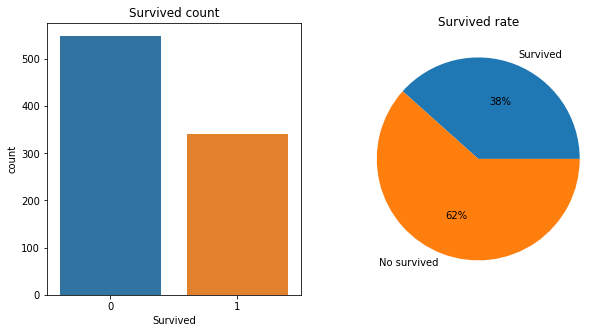

In [27]:
total_survived = data_t['Survived'].sum()
total_no_survived = 891 - total_survived

plt.figure(figsize = (10,5)) # 创建画布
plt.subplot(121) # 添加第一个子图
sns.countplot(x='Survived',data=data_t)
plt.title('Survived count')

plt.subplot(122) # 添加第二个子图
plt.pie([total_survived,total_no_survived],labels=['Survived','No survived'],autopct='%1.0f%%')
plt.title('Survived rate')

plt.show()

分别探索下 Pclass、Sex、Age 和 Embarked 等与“生还率”的关系.  
舱位（Pclass）与生还率关系  

In [28]:
# 不同船舱人数分布
data_t.pivot_table(values='Name',index='Pclass',aggfunc='count')

,Name
Pclass,
1,216
2,184
3,491


In [29]:
data_t[['Pclass','Name']].groupby(['Pclass']).count()

,Name
Pclass,
1,216
2,184
3,491


In [30]:
# 仓位与生还率关系
data_t.pivot_table(values='Survived',index='Pclass',aggfunc=np.mean)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [31]:
# 不同性别生还率
data_t.pivot_table(values='Survived',index='Sex',aggfunc=np.mean)


,Survived
Sex,
female,0.742038
male,0.188908


In [32]:
#首先计算不同舱位不同性别的人的生还概率
data_t.pivot_table(values='Survived', index=['Pclass','Sex'], aggfunc=np.mean)


Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

<p style="font-size:12px">
年龄（Age）与生还率关系  
与上面的舱位、性别这些分类变量不同，年龄是一个连续的数值变量，一般处理这样的数据类型，我们采用将连续性的变量离散化的方法。    
所谓离散化，指的是将某个变量的所在区间分割为几个小区间，落在同一个区间的观测值用同一个符号表示，简单理解就是将属于统一范围类的观测值分为一组, 然后分组观察。  
pandas中提供了cut函数，对变量进行离散化分割。  
</p>

In [33]:
data_t['AgeGroup'] = pd.cut(data_t['Age'], 5) # 将年龄的列数值划分为五等份
data_t.AgeGroup.value_counts(sort=False)

(-0.08, 16.0]    100
(16.0, 32.0]     525
(32.0, 48.0]     186
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeGroup, dtype: int64

In [34]:
# 各个年龄段的生还率
data_t.pivot_table(values = 'Survived', index = 'AgeGroup', aggfunc=np.mean)

,Survived
AgeGroup,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.344762
"(32.0, 48.0]",0.403226
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [35]:
# 年龄（Age），性别（Sex）与生还率关系
data_t.pivot_table(values='Survived', index='AgeGroup', columns='Sex', aggfunc=np.mean)


Sex,female,male
AgeGroup,,
"(-0.08, 16.0]",0.673469,0.431373
"(16.0, 32.0]",0.718391,0.159544
"(32.0, 48.0]",0.791045,0.184874
"(48.0, 64.0]",0.916667,0.177778
"(64.0, 80.0]",NaN,0.090909


In [36]:
# 年龄（Age），性别（Sex），舱位（Pclass）与生还率关系
data_t.pivot_table(values="Survived",index="AgeGroup",columns=["Sex","Pclass"],aggfunc=np.mean)

Sex              female                          male                    
Pclass                1         2         3         1         2         3
AgeGroup                                                                 
(-0.08, 16.0]  0.833333  1.000000  0.545455  1.000000  0.818182  0.270270
(16.0, 32.0]   0.975610  0.923077  0.521277  0.354167  0.086207  0.138776
(32.0, 48.0]   1.000000  0.904762  0.250000  0.435897  0.076923  0.055556
(48.0, 64.0]   0.941176  0.833333  1.000000  0.269231  0.090909  0.000000
(64.0, 80.0]        NaN       NaN       NaN  0.166667  0.000000  0.000000

In [37]:
# 家庭规模数据 分为5组
data_t['FamilyScale'] = pd.cut(data_t['SibSp'] + data_t['Parch'], 5) # 将年龄的列数值划分为五等份
data_t.FamilyScale.value_counts(sort=False)

(-0.01, 2.0]    800
(2.0, 4.0]       44
(4.0, 6.0]       34
(6.0, 8.0]        6
(8.0, 10.0]       7
Name: FamilyScale, dtype: int64

In [39]:
# 家庭规模数据与生还率关系
data_t.pivot_table(values="Survived", index="FamilyScale", aggfunc=np.mean)

,Survived
FamilyScale,
"(-0.01, 2.0]",0.388750
"(2.0, 4.0]",0.545455
"(4.0, 6.0]",0.205882
"(6.0, 8.0]",0.000000
"(8.0, 10.0]",0.000000
